# CS300-Artificial Intelligence : Đồ án cuối kì

---



## 1. Lấy mã nguồn từ thư viện nhóm

In [ ]:
!git clone https://github.com/liem18112000/CS300_FInalTerm.git

Cloning into 'CS300_FInalTerm'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 171 (delta 92), reused 131 (delta 52), pack-reused 0
Receiving objects: 100% (171/171), 632.14 KiB | 5.96 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## 2. Máy hỗ trợ Véc-tơ - Support Vector Machine

### a. Chuẩn bị các thư viện cần thiết

In [ ]:
from sklearn import svm, metrics
import tensorflow as tf
import os
import time
import numpy as np
from CS300_FInalTerm.factory import *
from CS300_FInalTerm.loader import *
from CS300_FInalTerm.utility import *

factory = ModelFactory.instance()
loader = Loader()

### b. Dữ liệu huấn luyện : Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = loader.load_dataset()

4423680/4422102 [==============================] - 0s 0us/step
Shape of original training examples: (60000, 28, 28)
Shape of original test examples: (10000, 28, 28)
Shape of original training result: (60000,)
Shape of original test result: (10000,)


### c. Các mẩu huấn luyện

In [ ]:
start = time.time()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

with strategy.scope():

    clf = factory.createSVMModel()

    # Learn the digits on the train subset
    clf.fit(np.reshape(x_train, (x_train.shape[0], -1)), y_train)

    # Predict the value of the digit on the test subset
    predicted = clf.predict(np.reshape(x_test, (x_test.shape[0], -1)))


    print("RESULT")
    ac_score = metrics.accuracy_score(y_test, predicted)
    cl_report = metrics.classification_report(y_test, predicted)
    print("Accuracy : ", ac_score)
    print(f"Classification report for classifier :\n"
        f"{metrics.classification_report(y_test, predicted)}\n")

end = time.time()
print("Eslapse time : " + str(end - start) + " seconds")

INFO:tensorflow:Initializing the TPU system: grpc://10.120.249.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.120.249.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


RESULT
Accuracy :  0.883
Classification report for classifier :
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Eslapse time : 1058.566123008728 seconds


## 2. Mạng nơ-ron tích chập - Convolutional Neural Network

### a. Chuẩn bị các thư viện cần thiết

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
from datetime import datetime
import os
from tensorflow.keras.optimizers import RMSprop,Adam
from CS300_FInalTerm.factory import *
from CS300_FInalTerm.loader import *
from CS300_FInalTerm.utility import *

factory = ModelFactory.instance()
loader = Loader()

def train_model(model):
    model.compile(
        optimizer ='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
    # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    history = model.fit(
        x_train_1, y_train_1, 
        validation_data = (x_val_1, y_val_1),
        batch_size=BATCH_SIZE, 
        epochs=EPOCHS,
        # callbacks = callbacks + [tensorboard_callback]
        callbacks = callbacks
    )

    return history

### b. Dữ liệu huấn luyện : Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = loader.load_dataset()

Shape of original training examples: (60000, 28, 28)
Shape of original test examples: (10000, 28, 28)
Shape of original training result: (60000,)
Shape of original test result: (10000,)


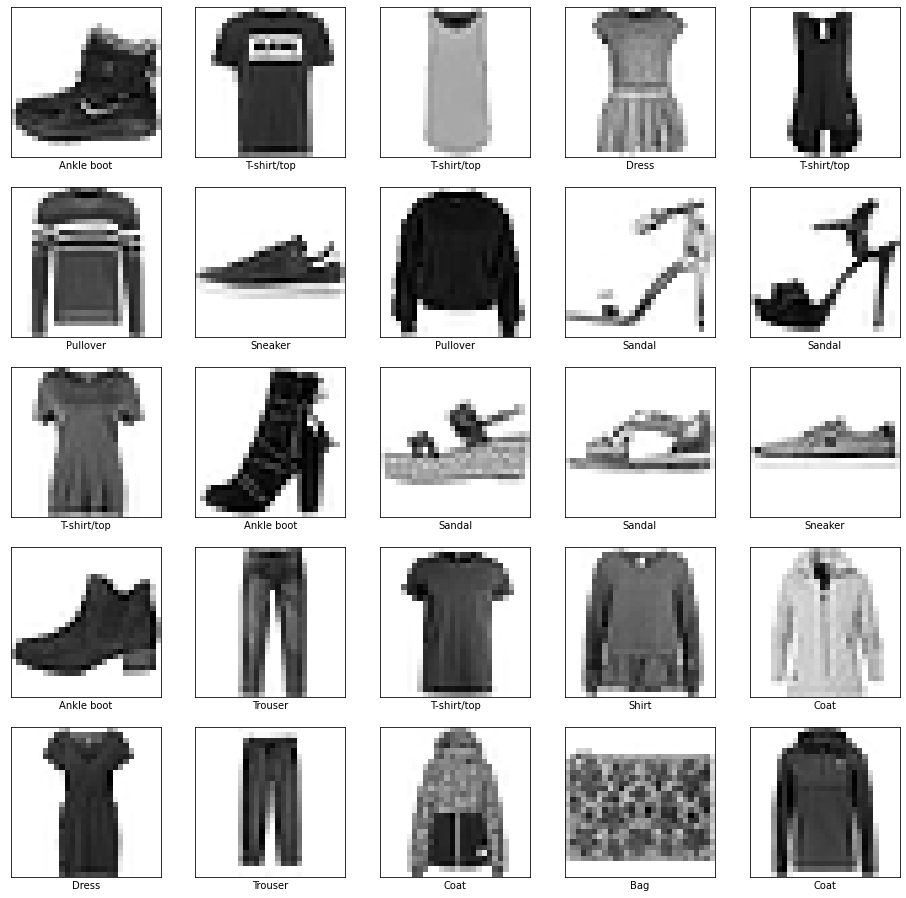

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### c. Các mẩu huấn luyện

In [ ]:
(x_train_1, y_train_1), (x_val_1, y_val_1), (x_test_1, y_test_1) = loader.load_dataset_expanddim()

Shape of original training examples: (60000, 28, 28)
Shape of original validation examples: (8000, 28, 28)
Shape of original test examples: (2000, 28, 28)
Shape of original training result: (60000, 10)
Shape of original validation result: (8000, 10)
Shape of original test result: (2000, 10)


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
x_train_1 = np.reshape(x_train_1, (60000, 28, 28, 1))
datagen.fit(x_train_1)
x_add_data = np.reshape([], (0, 28, 28, 1))
y_add_data = np.reshape([], (0, 10))
# here's a more "manual" example
for e in range(10):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train_1, y_train_1, batch_size=10000):
        x_add_data = np.concatenate((x_add_data,np.reshape(x_batch, (10000, 28, 28, 1))), axis = 0)
        y_add_data = np.concatenate((y_add_data,y_batch), axis = 0)
        batches += 1
        if batches >= len(x_train) / 10000:
            break

print(np.shape(x_add_data))
print(np.shape(y_add_data))

x_train_1 = x_add_data
y_train_1 = y_add_data

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
(600000, 28, 28, 1)
(600000, 10)


In [ ]:
BATCH_SIZE = 4096
EPOCHS = 200
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights= True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights= True),
]
histories = {}

---

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

with strategy.scope():
    model = factory.createMiniVGGModel(32)
    history = train_model(model)

INFO:tensorflow:Initializing the TPU system: grpc://10.120.249.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.120.249.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling3d (UpSampling3D) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

In [ ]:
histories['VGG19_32'] = (history, model.evaluate(x_test_1, y_test_1, BATCH_SIZE))

1/1 [==============================] - 2s 2s/step - loss: 0.2113 - accuracy: 0.9225


VGG19_32


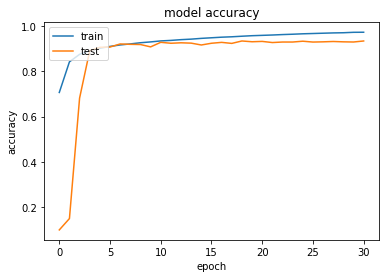

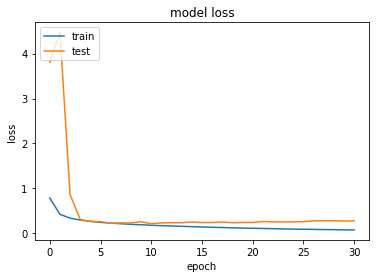

[0.2112504094839096, 0.9225000143051147]


In [ ]:
for model_name, (model_history, model_evaluation) in histories.items():
    print(model_name)
    visualize_history(model_history)
    print(model_evaluation)